# **DOG** **BREED**

In [2]:
import tensorflow as tf
print('TF version',tf.__version__)

TF version 2.3.0


In [3]:
import tensorflow_hub as hub
print('TF HUB version',hub.__version__)

TF HUB version 0.8.0


In [4]:
print('GPU','available(YESS)'if tf.config.list_physical_devices('GPU') else 'notavailable')

GPU available(YESS)


ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
labels_csv=pd.read_csv('/content/drive/My Drive/Dog vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     41397398c9a57e8a11dc9c1d898bdf8a  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv['breed'].value_counts().median()

82.0

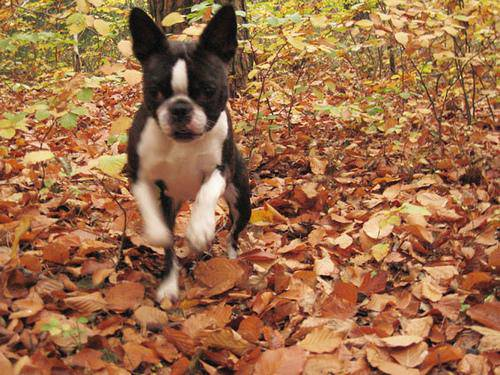

In [ ]:
from IPython.display import Image
Image("/content/drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
filenames=['/content/drive/My Drive/Dog vision/train/'+fname+'.jpg' for fname in labels_csv['id']]
filenames[:10]

['/content/drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("/content/drive/My Drive/Dog vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


In [ ]:
import numpy as np
labels=labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels)==len(filenames):
  print('yes')
else:
  print('no')  

yes


In [ ]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
 # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Set a data


In [ ]:
from sklearn.model_selection import train_test_split
NUM_IMAGES = 1000
X=filenames
y=boolean_labels
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [ ]:
len(X_train,),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
IMAGE_SIZE=224
def process_image(image_path,IMAGE_SIZE=224):
  image=tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[IMAGE_SIZE,IMAGE_SIZE])
  return image

In [ ]:
def get_image_label(image_path,labels):
  image=process_image(image_path)
  return image,labels

In [ ]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data=create_data_batches(X_train,y_train)
valid_data=create_data_batches(X_val,y_val)

Creating training data batches...
Creating training data batches...


In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [ ]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/My Drive/Dog vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
NUM_EPOCHS=100 #@param {type:'slider',min:10,max:100,step:10}

In [ ]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [ ]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 407s 16s/step - loss: 4.6074 - accuracy: 0.1050 - val_loss: 3.5995 - val_accuracy: 0.2000
Epoch 2/100
25/25 [==============================] - 5s 180ms/step - loss: 1.6577 - accuracy: 0.6787 - val_loss: 2.2091 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 178ms/step - loss: 0.5695 - accuracy: 0.9375 - val_loss: 1.7089 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 4s 177ms/step - loss: 0.2559 - accuracy: 0.9900 - val_loss: 1.5150 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 4s 177ms/step - loss: 0.1477 - accuracy: 0.9962 - val_loss: 1.5436 - val_accuracy: 0.6050
Epoch 6/100
25/25 [==============================] - 4s 180ms/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 1.4038 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ vision/logs

<IPython.core.display.Javascript object>

In [ ]:
prediction=model.predict(valid_data,verbose=1)
prediction


7/7 [==============================] - 1s 130ms/step


array([[9.99676413e-05, 2.86535476e-04, 1.21602796e-04, ...,
        9.96818108e-06, 6.48222613e-06, 2.35204445e-03],
       [4.59684641e-04, 1.63231249e-04, 1.90437082e-02, ...,
        9.13882977e-04, 1.12463465e-04, 1.04797101e-02],
       [8.68114352e-04, 7.10137635e-02, 1.42539138e-04, ...,
        2.50305253e-04, 6.13328011e-04, 4.30028595e-05],
       ...,
       [1.35020004e-04, 4.84792909e-05, 5.85914031e-03, ...,
        5.61841065e-03, 4.49272076e-04, 6.23228334e-05],
       [6.97617372e-03, 4.64715791e-04, 8.89723946e-04, ...,
        8.36746913e-05, 1.56859227e-04, 3.72395664e-02],
       [1.17674797e-04, 1.99807109e-04, 1.61357675e-04, ...,
        1.19645265e-04, 6.33554737e-05, 3.00364172e-06]], dtype=float32)

In [ ]:
len(prediction)

200

In [ ]:
unique_breeds[np.argmax(prediction[2])],np.argmax(prediction[2])

('irish_water_spaniel', 58)

In [ ]:
np.sum(prediction[0])

0.9999999

In [ ]:
index=199
print(f"max value(probability of prediction):{np.max(prediction[index])}")
print(f"sum:{np.sum(prediction[index])}")
print(f'arg max:{np.argmax(prediction[index])}')
print(f"prediction label:{unique_breeds[np.argmax(prediction[index])]}")

max value(probability of prediction):0.8224644660949707
sum:1.000000238418579
arg max:67
prediction label:labrador_retriever


In [ ]:

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(prediction[0])
pred_label

'cocker_spaniel'

In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.45253643, 0.39595112, 0.38390765],
         [0.45943952, 0.35880047, 0.31768528],
         [0.3511268 , 0.2396247 , 0.17109774],
         ...,
         [0.11463671, 0.11463671, 0.11463671],
         [0.11746023, 0.12316761, 0.13041547],
         [0.15767698, 0.17159985, 0.17610922]],
 
        [[0.38578433, 0.34072927, 0.33634377],
         [0.40971172, 0.3289901 , 0.28733543],
         [0.3491563 , 0.2466815 , 0.18659988],
         ...,
         [0.28951964, 0.28379485, 0.28665724],
         [0.26904672, 0.2710227 , 0.2787051 ],
         [0.24812864, 0.25150678, 0.25894326]],
 
        [[0.3437262 , 0.3209825 , 0.31916174],
         [0.3715599 , 0.31296006, 0.2824444 ],
         [0.3482055 , 0.26687494, 0.21900384],
         ...,
         [0.31779972, 0.30104545, 0.3040497 ],
         [0.2722373 , 0.2631663 , 0.27518484],
         [0.20871039, 0.20165728, 0.21276543]],
 
        ...,
 
        [[0.4602348 , 0.3935681 , 0.3543524 ],
         [0.36988595, 0.3032193 , 0.27184

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)   

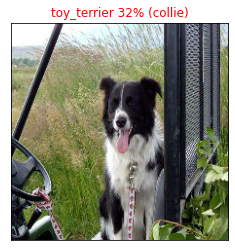

In [ ]:
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images,n=1)

In [ ]:
prediction[0][prediction[0].argsort()[-10:][::-1]]

array([0.33824155, 0.3022883 , 0.10674525, 0.06749312, 0.02212517,
       0.01725446, 0.01438753, 0.01428741, 0.01204042, 0.01129287],
      dtype=float32)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass
    

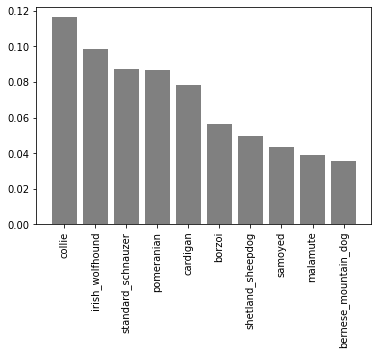

In [ ]:
plot_pred_conf(prediction_probabilities=prediction,
               labels=val_labels,
               n=9)

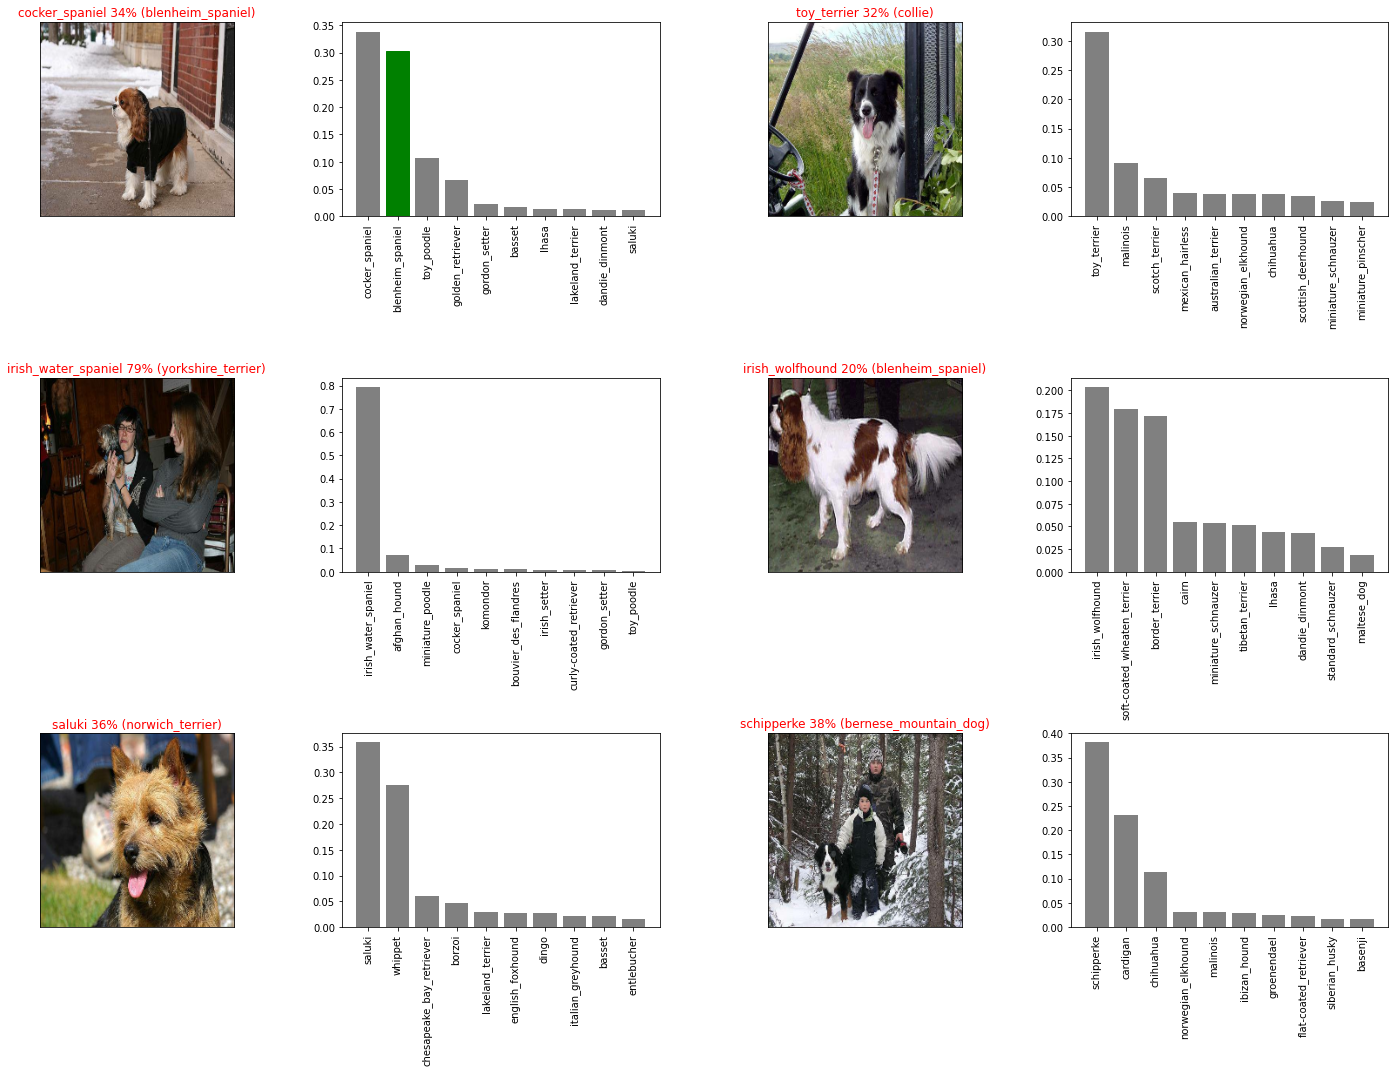

In [ ]:

i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=prediction,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=prediction,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/My Drive/Dog vision/model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/My Drive/Dog vision/model/20200425-06431587797005-1000-images-Adam.h5...


'/content/drive/My Drive/Dog vision/model/20200425-06431587797005-1000-images-Adam.h5'

In [ ]:
model_1000_images = load_model('/content/drive/My Drive/Dog vision/model/20200425-06431587797005-1000-images-Adam.h5')

Loading saved model from: /content/drive/My Drive/Dog vision/model/20200425-06431587797005-1000-images-Adam.h5


In [ ]:
model.evaluate(valid_data)

7/7 [==============================] - 1s 109ms/step - loss: 1.3105 - accuracy: 0.6300


[1.3105032444000244, 0.6299999952316284]

In [ ]:
model_1000_images.evaluate(valid_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.3101 - accuracy: 0.6300


[1.3101398944854736, 0.6299999952316284]

In [ ]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
292/320 [==========================>...] - ETA: 5:37 - loss: 1.3723 - accuracy: 0.6646

In [ ]:
test_path = "/content/drive/My Drive/Dog vision/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]